In [59]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt 
import cv2 as cv
import seaborn as sns
from utilities import *

In [2]:
def classify_cancer_using_mask(image_path):
    if np.sum(cv.imread(image_path)) == 0:
        return 0
    else:
        return 1

def generate_vector(image_path):
    image_matrix = cv.imread(image_path)
    return image_matrix.reshape(1,-1)



In [3]:
image_paths = dict()
counter = 0
test = "TCGA_CS_6667_20011105_8"
path_to_folders = "/Users/christianpederjacobsen/Dropbox/Mac/Desktop/leg/brain_cancer_seg/data/archive/kaggle_3m"
for folder in os.listdir(path_to_folders):
    path_to_folder = os.path.join(path_to_folders,folder)
    if os.path.isdir(path_to_folder):
        for file in os.listdir(path_to_folder):
            counter += 1
            path_to_file = os.path.join(path_to_folder,file)
            patient_slice = file.replace(".tif","").replace("_mask","")

            if "TCGA_CS_6667_20011105_8" in file:
                print(file,patient_slice)
            if patient_slice == test:
                print(file)
            mask = True if "mask" in file else False
            if patient_slice not in image_paths.keys():
                if mask:
                    image_paths[patient_slice] = {"mask":path_to_file}
                else:
                    image_paths[patient_slice] = {"image":path_to_file}
            else:
                if mask:
                    image_paths[patient_slice]["mask"]  = path_to_file
                else:
                    image_paths[patient_slice]["image"] = path_to_file


image_df = pd.DataFrame.from_dict(image_paths).T
image_df.reset_index(inplace=True)
image_df = image_df.rename(columns={'index': 'patient_slice'})
image_df["patient"] = ["_".join(x.split("_")[:4]) for x in image_df["patient_slice"]]
image_df["diagnosis"] = image_df["mask"].apply(classify_cancer_using_mask)
image_df["slice"] = [int(x.split("_")[-1]) for x in image_df["patient_slice"]]

TCGA_CS_6667_20011105_8_mask.tif TCGA_CS_6667_20011105_8
TCGA_CS_6667_20011105_8_mask.tif
TCGA_CS_6667_20011105_8.tif TCGA_CS_6667_20011105_8
TCGA_CS_6667_20011105_8.tif


In [4]:
image_df

,patient_slice,mask,image,patient,diagnosis,slice
0,TCGA_CS_6667_20011105_8,/Users/christianpederjacobsen/Dropbox/Mac/Desk...,/Users/christianpederjacobsen/Dropbox/Mac/Desk...,TCGA_CS_6667_20011105,0,8
1,TCGA_CS_6667_20011105_9,/Users/christianpederjacobsen/Dropbox/Mac/Desk...,/Users/christianpederjacobsen/Dropbox/Mac/Desk...,TCGA_CS_6667_20011105,0,9
2,TCGA_CS_6667_20011105_2,/Users/christianpederjacobsen/Dropbox/Mac/Desk...,/Users/christianpederjacobsen/Dropbox/Mac/Desk...,TCGA_CS_6667_20011105,0,2
3,TCGA_CS_6667_20011105_3,/Users/christianpederjacobsen/Dropbox/Mac/Desk...,/Users/christianpederjacobsen/Dropbox/Mac/Desk...,TCGA_CS_6667_20011105,0,3
4,TCGA_CS_6667_20011105_20,/Users/christianpederjacobsen/Dropbox/Mac/Desk...,/Users/christianpederjacobsen/Dropbox/Mac/Desk...,TCGA_CS_6667_20011105,0,20
...,...,...,...,...,...,...
3924,TCGA_FG_A60K_20040224_40,/Users/christianpederjacobsen/Dropbox/Mac/Desk...,/Users/christianpederjacobsen/Dropbox/Mac/Desk...,TCGA_FG_A60K_20040224,1,40
3925,TCGA_FG_A60K_20040224_68,/Users/christianpederjacobsen/Dropbox/Mac/Desk...,/Users/christianpederjacobsen/Dropbox/Mac/Desk...,TCGA_FG_A60K_20040224,0,68
3926,TCGA_FG_A60K_20040224_69,/Users/christianpederjacobsen/Dropbox/Mac/Desk...,/Users/christianpederjacobsen/Dropbox/Mac/Desk...,TCGA_FG_A60K_20040224,0,69
3927,TCGA_FG_A60K_20040224_57,/Users/christianpederjacobsen/Dropbox/Mac/Desk...,/Users/christianpederjacobsen/Dropbox/Mac/Desk...,TCGA_FG_A60K_20040224,1,57


In [5]:
labels,counts = np.unique(image_df["diagnosis"],return_counts=True)
print("Number of positive and negative observations")
print(labels,counts)

Number of positive and negative observations
[0 1] [2556 1373]


In [6]:
image_df[["image","diagnosis"]]


,image,diagnosis
0,/Users/christianpederjacobsen/Dropbox/Mac/Desk...,0
1,/Users/christianpederjacobsen/Dropbox/Mac/Desk...,0
2,/Users/christianpederjacobsen/Dropbox/Mac/Desk...,0
3,/Users/christianpederjacobsen/Dropbox/Mac/Desk...,0
4,/Users/christianpederjacobsen/Dropbox/Mac/Desk...,0
...,...,...
3924,/Users/christianpederjacobsen/Dropbox/Mac/Desk...,1
3925,/Users/christianpederjacobsen/Dropbox/Mac/Desk...,0
3926,/Users/christianpederjacobsen/Dropbox/Mac/Desk...,0
3927,/Users/christianpederjacobsen/Dropbox/Mac/Desk...,1


# Encoding images

In [7]:
image_df["slice"] == 8

0        True
1       False
2       False
3       False
4       False
        ...  
3924    False
3925    False
3926    False
3927    False
3928    False
Name: slice, Length: 3929, dtype: bool

In [8]:
from sklearn.decomposition import PCA
slice = 10
encoded_images = np.array([generate_vector(im_path) for im_path in image_df[image_df["slice"] == slice]["image"]]).reshape(len(image_df[image_df["slice"] == slice]["image"]),-1)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(encoded_images)


In [9]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])
# principalDf["label"] = image_df[image_df["slice"] == slice]["diagnosis"]
# principalDf
diagnosis = image_df[image_df["slice"] == slice]["diagnosis"].values
principalDf["diagnosis"] = diagnosis
principalDf

,pc1,pc2,diagnosis
0,5161.976332,-1580.012138,1
1,-5179.533343,1349.050288,0
2,-4348.259032,-1157.681897,0
3,-6342.852210,1719.902771,0
4,4225.544402,-624.092754,0
...,...,...,...
105,5899.157027,2241.650530,0
106,-2917.928267,-218.131892,0
107,-2434.932694,6013.464133,0
108,314.439684,-2912.239252,0


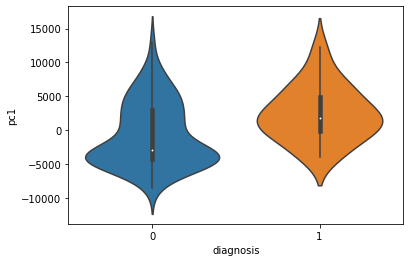

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

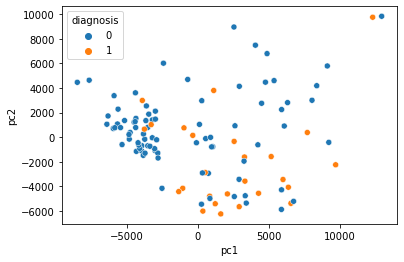

In [10]:
sns.violinplot(data=principalDf,y="pc1",x="diagnosis")
plt.show()
sns.scatterplot(data=principalDf,x="pc1",y="pc2",hue="diagnosis")

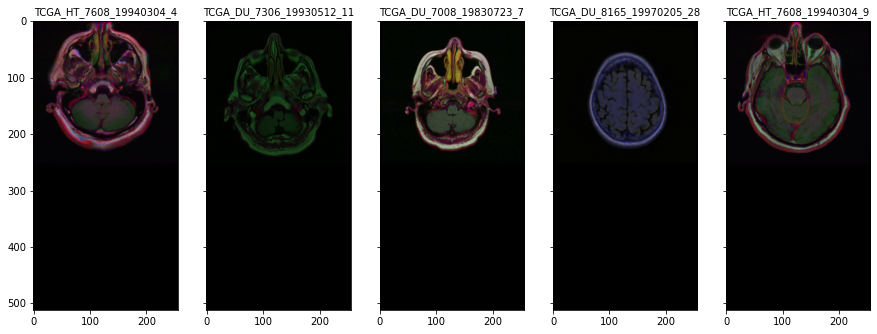

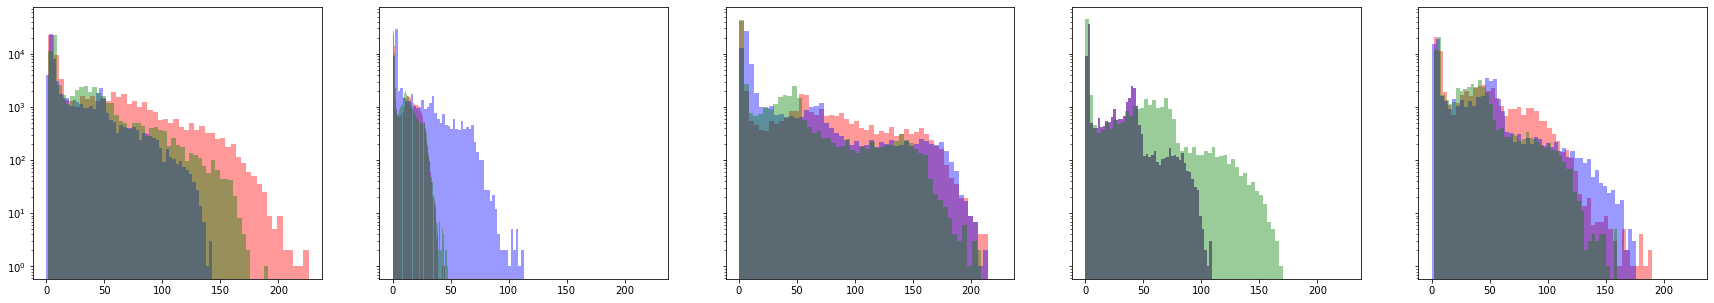

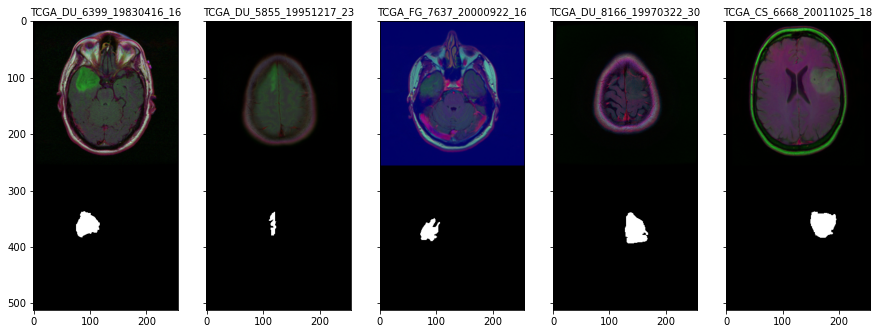

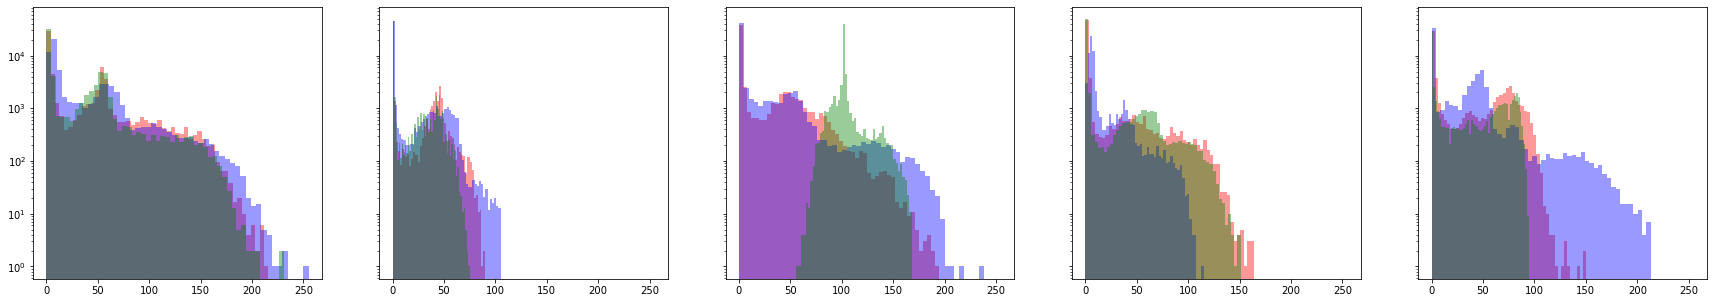

In [19]:
def show_sample(sample):
    fig, axes = plt.subplots(nrows=1,ncols=len(sample),sharey=True,sharex=True,figsize=(15,15))

    for i,(j,row) in enumerate(sample.iterrows()):
        image = cv.imread(row["image"])
        mask = cv.imread(row["mask"])
        vis = np.concatenate((image, mask), axis=0)
        axes[i].imshow(vis)
        axes[i].set_title(row["patient_slice"],size=10)

def show_color_channel(sample):
    fig, axes = plt.subplots(nrows=1,ncols=len(sample),sharey=True,sharex=True,figsize=(30,5))
    colors = ["r","b","g"]
    for i,(j,row) in enumerate(sample.iterrows()):
        
        image = cv.imread(row["image"])
        for k in range(3):
            channel = image[:,:,k]
            axes[i].hist(channel.reshape(-1), alpha=0.4, log=True, bins=50, color=colors[k])



sample_1 = image_df[image_df.diagnosis == 1].sample(5)
sample_0 =  image_df[image_df.diagnosis == 0].sample(5)

show_sample(sample_0)
show_color_channel(sample_0)
show_sample(sample_1)
show_color_channel(sample_1)

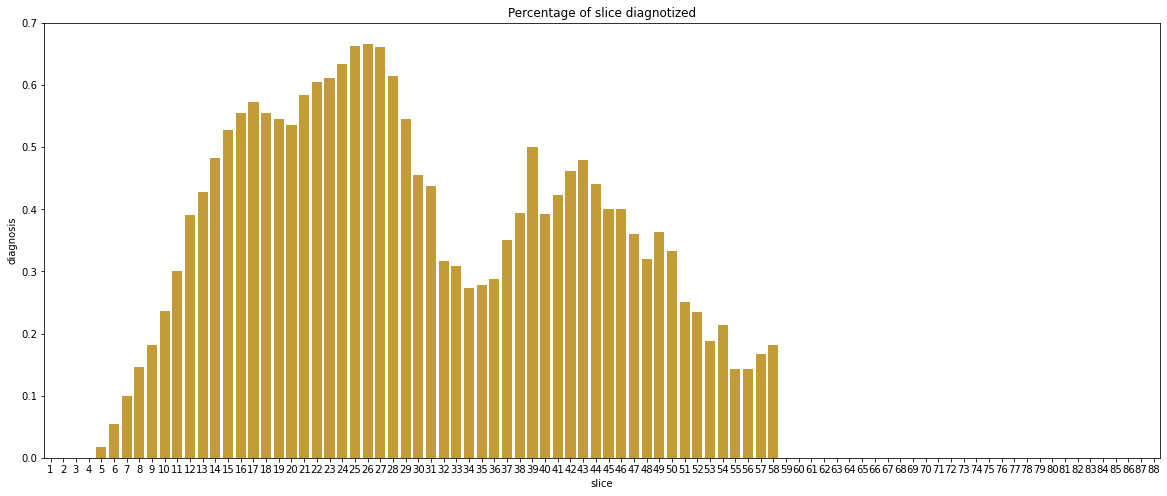

In [12]:
fig = plt.figure(figsize=(20,8))
sns.barplot(data = image_df, x="slice", y="diagnosis", color='goldenrod', label="Some Label",ci=None)
plt.title("Percentage of slice diagnotized")
plt.show()

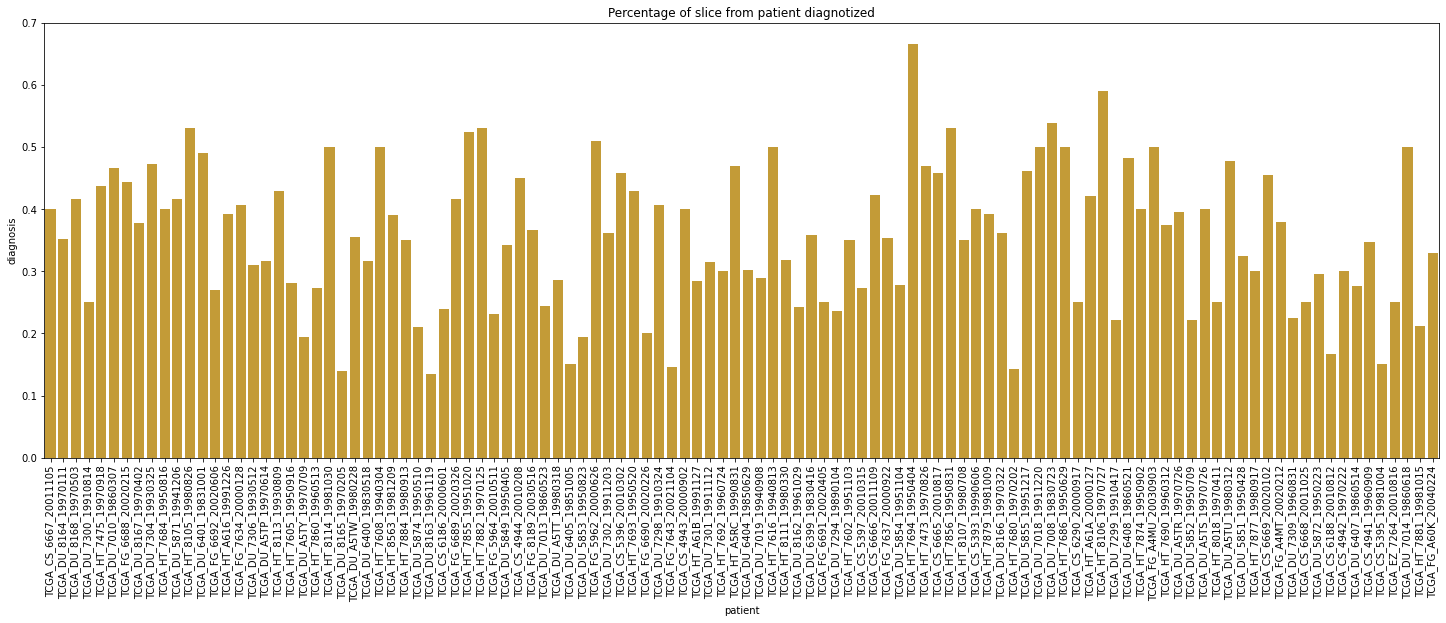

In [13]:
fig = plt.figure(figsize=(25,8))
sns.barplot(data = image_df, x="patient", y="diagnosis", color='goldenrod', label="Some Label",ci=None)
plt.title("Percentage of slice from patient diagnotized")
plt.xticks(rotation=90)
plt.show()

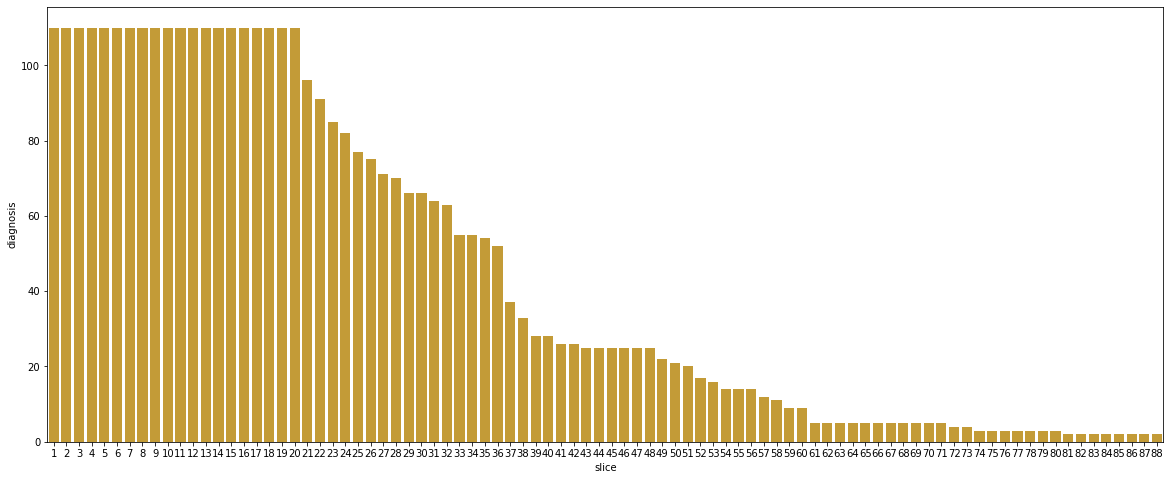

In [14]:
fig = plt.figure(figsize=(20,8))
aggregated = image_df.groupby("slice").count()
aggregated.reset_index(inplace=True)

sns.barplot(data = aggregated, x="slice", y="diagnosis", color='goldenrod', label="Some Label")
plt.show()

**Conclusions**
- The data contains multiple slices, with not all containing an equal number of observations
- The photos might be distinguishable by using a PCA analysis? 
- Not all slices have an equal distribution of cancer (Which can introduce a bias)
    - If a slice comes from one particularly prone to cancer in this dataset, it might predict based only on the slice...
- Not all patients contain an equal amount of cancer (Which can introduce a bias)
    - If a slice comes from one particularly prone to cancer in this dataset, it might predict based only on the slice...
- It might be favorable to remove the higher slices as they do not have any cancer specimens

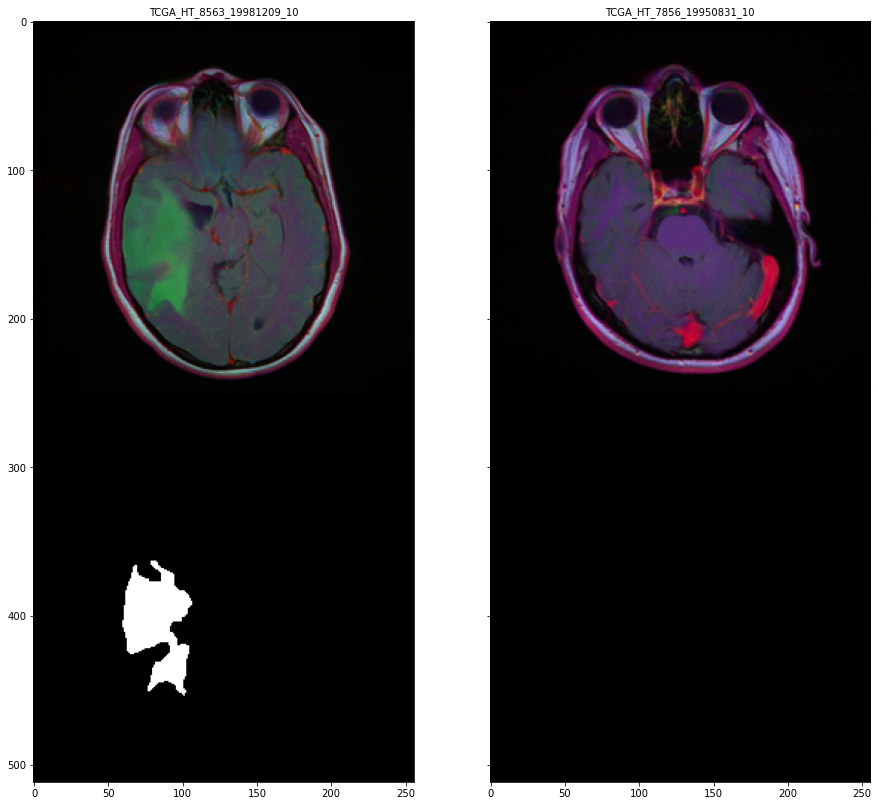

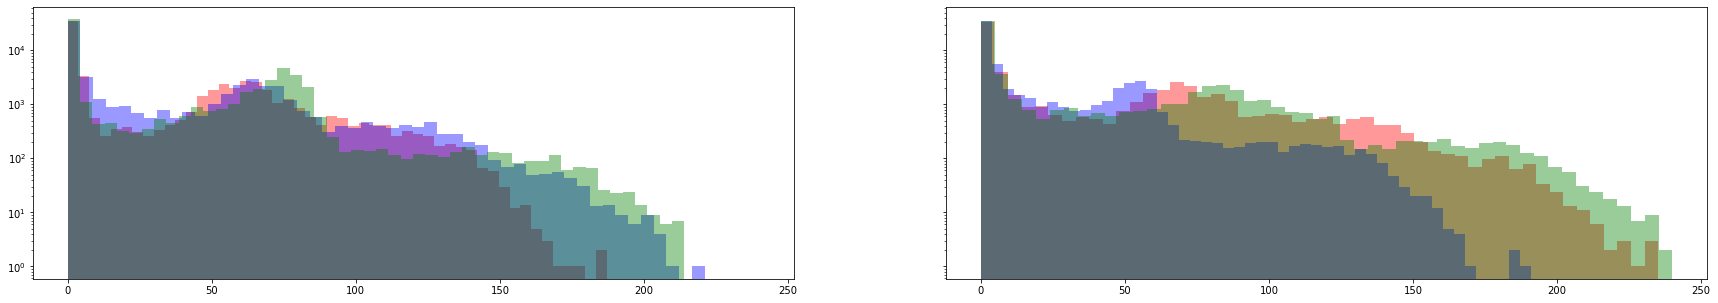

In [58]:
sample_slice = image_df[image_df.slice == 10].sample(2)
show_sample(sample_slice)
show_color_channel(sample_slice)